<a href="https://colab.research.google.com/github/vladimyr02/cd-Vladimyr-Gonzalez-2023/blob/main/Taller6ClaseCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresión logística**

Al igual que la regresión lineal múltiple, la regresión logística es una técnica para comprobar hipótesis y relaciones. Tiene la caracteristica adicional de permitir una variable de respuesta de tipo categórica.


![DiferenciaRegresionLineal](https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png)

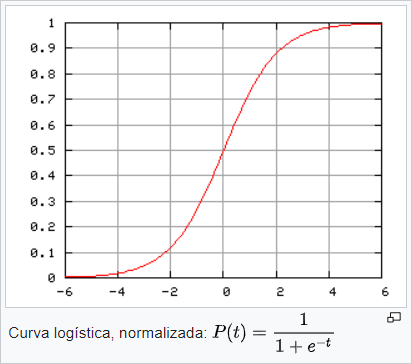

##**Base de datos del titanic**

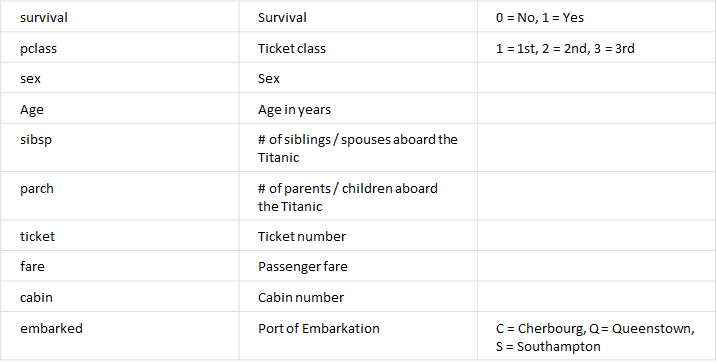


In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Verificar nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop('Cabin', axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df["Sex2"] = 0
df.Sex2.loc[df.Sex=="female"] = 1
df.Sex2.loc[df.Sex=="male"] = 0
df

<ipython-input-8-8d0d7571fd9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="female"] = 1
<ipython-input-8-8d0d7571fd9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="male"] = 0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex2
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,1
886,887,0,2,male,27.0,0,0,13.0000,S,0
887,888,1,1,female,19.0,0,0,30.0000,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [ ]:
df = df.drop('Sex', axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex2
0,1,0,3,22.0,1,0,7.2500,S,0
1,2,1,1,38.0,1,0,71.2833,C,1
2,3,1,3,26.0,0,0,7.9250,S,1
3,4,1,1,35.0,1,0,53.1000,S,1
4,5,0,3,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,Q,1
886,887,0,2,27.0,0,0,13.0000,S,0
887,888,1,1,19.0,0,0,30.0000,S,1
889,890,1,1,26.0,0,0,30.0000,C,0


In [ ]:
df["EmbarkedC"] = 0
df.EmbarkedC.loc[df.Embarked=="C"] = 1
df.EmbarkedC.loc[df.Embarked!="C"] = 0
df

<ipython-input-10-def598998efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedC.loc[df.Embarked=="C"] = 1
<ipython-input-10-def598998efa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedC.loc[df.Embarked!="C"] = 0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex2,EmbarkedC
0,1,0,3,22.0,1,0,7.2500,S,0,0
1,2,1,1,38.0,1,0,71.2833,C,1,1
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,Q,1,0
886,887,0,2,27.0,0,0,13.0000,S,0,0
887,888,1,1,19.0,0,0,30.0000,S,1,0
889,890,1,1,26.0,0,0,30.0000,C,0,1


In [ ]:
df["EmbarkedS"] = 0
df.EmbarkedS.loc[df.Embarked=="S"] = 1
df.EmbarkedS.loc[df.Embarked!="S"] = 0
df["EmbarkedQ"] = 0
df.EmbarkedQ.loc[df.Embarked=="Q"] = 1
df.EmbarkedQ.loc[df.Embarked!="Q"] = 0
df

<ipython-input-11-2fdab0c5144d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedS.loc[df.Embarked=="S"] = 1
<ipython-input-11-2fdab0c5144d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedS.loc[df.Embarked!="S"] = 0
<ipython-input-11-2fdab0c5144d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EmbarkedQ.loc[df.Embarked=="Q"] = 1
<ipython-input-11-2fdab0c5144d>:6: SettingWithCopyWarning: 
A value is trying t

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex2,EmbarkedC,EmbarkedS,EmbarkedQ
0,1,0,3,22.0,1,0,7.2500,S,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,C,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,S,1,0,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,Q,1,0,0,1
886,887,0,2,27.0,0,0,13.0000,S,0,0,1,0
887,888,1,1,19.0,0,0,30.0000,S,1,0,1,0
889,890,1,1,26.0,0,0,30.0000,C,0,1,0,0


In [ ]:
df = df.drop('Embarked', axis = 1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2,EmbarkedC,EmbarkedS,EmbarkedQ
0,1,0,3,22.0,1,0,7.2500,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,1,0
3,4,1,1,35.0,1,0,53.1000,1,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,1,0,0,1
886,887,0,2,27.0,0,0,13.0000,0,0,1,0
887,888,1,1,19.0,0,0,30.0000,1,0,1,0
889,890,1,1,26.0,0,0,30.0000,0,1,0,0


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex2             int64
EmbarkedC        int64
EmbarkedS        int64
EmbarkedQ        int64
dtype: object

In [ ]:
x = df.iloc[:,[2,3,4,5,6,7,8,9,10]]
y = df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.444061
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.3419
Time:                        13:33:40   Log-Likelihood:                -316.17
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 3.392e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1993      0.165     -7.285      0.000      -1.522      -0.877
Age           -0.0433      0.

In [5]:
import itertools
import numpy as np

max_pseudo_r_squared = -np.inf
best_combination = None
best_result = None

# Obtener todas las columnas del DataFrame excepto "Survived"
independent_columns = df.columns.difference(['Survived'])

# Crear una lista de todas las combinaciones de columnas
all_combinations = []
for r in range(1, len(independent_columns) + 1):
    combinations_r = itertools.combinations(independent_columns, r)
    all_combinations.extend(combinations_r)

# Iterar sobre todas las combinaciones y calcular pseudo R-cuadrado
for combination in all_combinations:
    # Seleccionar las columnas de la combinación actual
    x_combination = df[list(combination)]

    # Ajustar el modelo de regresión logística
    logit_model = sm.Logit(y, x_combination)
    result = logit_model.fit()

    # Calcular pseudo R-cuadrado
    # Pseudo R-cuadrado utilizado aquí es el pseudo R-cuadrado de McFadden
    pseudo_r_squared = 1 - result.llf / result.llnull

    # Actualizar el modelo con el mayor pseudo R-cuadrado
    if pseudo_r_squared > max_pseudo_r_squared:
        max_pseudo_r_squared = pseudo_r_squared
        best_combination = combination
        best_result = result

# Imprimir resumen para el modelo con el mayor pseudo R-cuadrado
print("Mejor combinación de variables independientes:", list(best_combination))
print("Pseudo R-cuadrado (McFadden):", max_pseudo_r_squared)
print(best_result.summary())





Optimization terminated successfully.
         Current function value: 0.671406
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688879
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689416
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663482
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686284
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693143
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.681663
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.646769
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.644397
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.687447
  